In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import chromadb
import json
import pandas as pd
from chromadb.utils.data_loaders import ImageLoader
from weavingtools.embedding_tools import SigLIPEmbedder
from weavingtools.weaving_tools import plot_query_results

/Users/kasparbeelen/anaconda3/envs/heritageweaver/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [3]:
checkpoint = 'google/siglip-base-patch16-224'

siglip_embedder = SigLIPEmbedder(checkpoint)

client = chromadb.PersistentClient(path="ce_comms_db")

data_loader = ImageLoader()

collection_db = client.get_or_create_collection(name="ce_comms_db", 
                                             metadata={"hnsw:space": "cosine"},
                                             embedding_function=siglip_embedder, 
                                             data_loader=data_loader
                                            )

collection_df = pd.read_csv('data/communications_data.csv')
collection_df.shape[0], collection_db.count()

(6020, 22026)

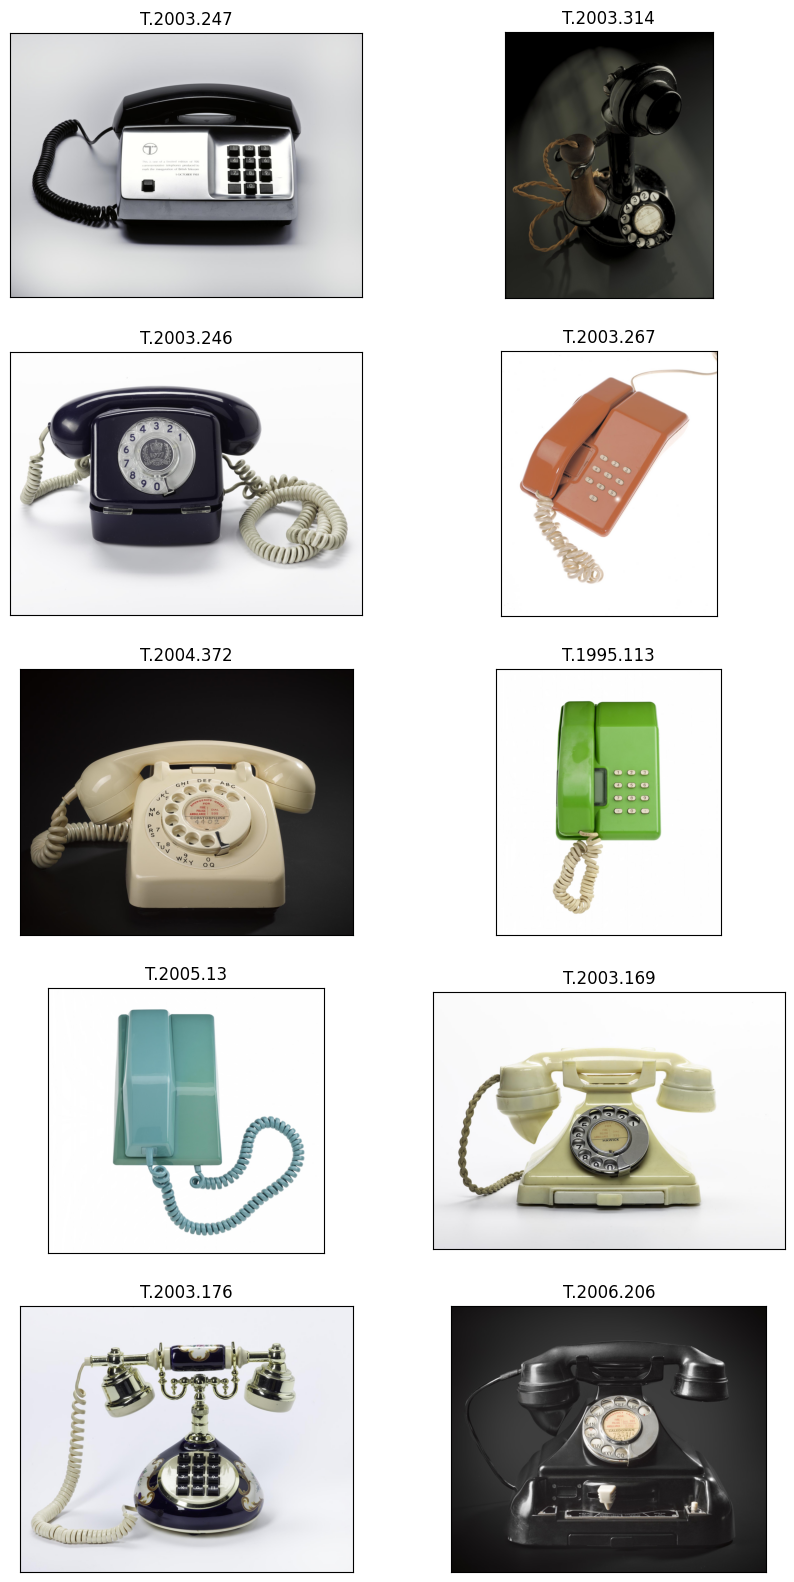

In [6]:
filters = {
    "$and": [
        {
            "input_modality": {
                "$eq": "image"
            }
        },
        {
            "collection": {
                "$eq" : "nms"
            }
        }
    ]
}

#results = collection_db.query(query_uris=[query_img],where=filters, n_results=10)
results = collection_db.query(query_texts=['telephone'],where=filters, n_results=25)
query_df = plot_query_results(results, collection_df, source='img_url')